## Import Dependencies

In [1]:
# Import depdendencies
import pandas as pd

## Read in the Dataset

In [2]:
# Read in the CSV
dataset = "../Data/dataset.csv"

df = pd.read_csv(dataset)

In [3]:
# Display the training dataset
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Exploration

In [4]:
# Review what diseases are in the "Disease" column
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [5]:
# Review how many of each disease are in the dataset
df['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

## Data Pre-Processing - Feature Data

In [6]:
# Only include 5 disease in the dataset for machine learning
diseases = ['Allergy', 'Drug Reaction', 'Migraine', 'Common Cold', 'Pneumonia']
diseases_df = df.loc[df['Disease'].isin(diseases)]

In [7]:
# Review which diseases are in the new dataset
diseases_df['Disease'].value_counts()

Disease
Allergy          120
Drug Reaction    120
Migraine         120
Common Cold      120
Pneumonia        120
Name: count, dtype: int64

In [8]:
# Separate the Features from the Outputs
X = diseases_df.drop(columns='Disease')
y = diseases_df['Disease']

In [9]:
# Review the features data
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
10,continuous_sneezing,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,continuous_sneezing,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,continuous_sneezing,shivering,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,continuous_sneezing,shivering,chills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X, dtype=int)

In [11]:
# Review the features data after applying get_dummies
X.head()

,Symptom_1_ acidity,Symptom_1_ chills,Symptom_1_ continuous_sneezing,Symptom_1_ fatigue,Symptom_1_ indigestion,Symptom_1_ shivering,Symptom_1_ skin_rash,Symptom_1_itching,Symptom_2_ chills,Symptom_2_ cough,...,Symptom_12_ sinus_pressure,Symptom_13_ congestion,Symptom_13_ runny_nose,Symptom_14_ chest_pain,Symptom_14_ congestion,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain
10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Review the list of symptoms for renaming and to see if there are repeat columns
X.columns

Index(['Symptom_1_ acidity', 'Symptom_1_ chills',
       'Symptom_1_ continuous_sneezing', 'Symptom_1_ fatigue',
       'Symptom_1_ indigestion', 'Symptom_1_ shivering',
       'Symptom_1_ skin_rash', 'Symptom_1_itching', 'Symptom_2_ chills',
       'Symptom_2_ cough', 'Symptom_2_ fatigue', 'Symptom_2_ headache',
       'Symptom_2_ indigestion', 'Symptom_2_ shivering',
       'Symptom_2_ skin_rash', 'Symptom_2_ stomach_pain',
       'Symptom_3_ blurred_and_distorted_vision',
       'Symptom_3_ burning_micturition', 'Symptom_3_ chills',
       'Symptom_3_ cough', 'Symptom_3_ fatigue', 'Symptom_3_ headache',
       'Symptom_3_ high_fever', 'Symptom_3_ stomach_pain',
       'Symptom_3_ watering_from_eyes',
       'Symptom_4_ blurred_and_distorted_vision', 'Symptom_4_ breathlessness',
       'Symptom_4_ burning_micturition', 'Symptom_4_ cough',
       'Symptom_4_ excessive_hunger', 'Symptom_4_ high_fever',
       'Symptom_4_ spotting_ urination', 'Symptom_4_ watering_from_eyes',
       'Sy

In [13]:
# Remove the "Symptom_X_ " from the column titles by defining a function
# Found code for "str.lstrip" here: https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas
def remove_prefix(df, prefix):
    df.columns=df.columns.str.lstrip(prefix)


remove_prefix(X, 'Symptom_1_ ')
remove_prefix(X, '2_ ')
remove_prefix(X, '3_ ')
remove_prefix(X, '4_ ')
remove_prefix(X, '5_ ')
remove_prefix(X, '6_ ')
remove_prefix(X, '7_ ')
remove_prefix(X, '8_ ')
remove_prefix(X, '9_ ')
remove_prefix(X, '0_ ')

In [14]:
# Determine which columns have duplicate names
duplicated_columns = X.columns[X.columns.duplicated()]
duplicated_columns

Index(['chills', 'fatigue', 'indigestion', 'shivering', 'skin_rash', 'chills',
       'cough', 'fatigue', 'headache', 'stomach_pain',
       'blurred_and_distorted_vision', 'burning_micturition', 'cough',
       'high_fever', 'watering_from_eyes', 'breathlessness',
       'excessive_hunger', 'headache', 'high_fever', 'spotting_ urination',
       'headache', 'stiff_neck', 'sweating', 'depression', 'malaise',
       'swelled_lymph_nodes', 'irritability', 'malaise', 'phlegm',
       'chest_pain', 'phlegm', 'visual_disturbances', 'fast_heart_rate',
       'throat_irritation', 'redness_of_eyes', 'rusty_sputum',
       'sinus_pressure', 'runny_nose', 'chest_pain', 'congestion',
       'chest_pain', 'loss_of_smell', 'muscle_pain'],
      dtype='object')

In [15]:
# Rename duplicated columns
X.columns = [
    'acidity', 'chills1', 'continuous_sneezing', 'fatigue1', 'indigestion1',
    'shivering1', 'skin_rash1', 'itching', 'chills2', 'cough1', 'fatigue2',
    'headache1', 'indigestion2', 'shivering2', 'skin_rash2', 'stomach_pain1',
    'blurred_and_distorted_vision1', 'burning_micturition1', 'chills3',
    'cough2', 'fatigue3', 'headache2', 'high_fever1', 'stomach_pain2',
    'watering_from_eyes1', 'blurred_and_distorted_vision2', 'breathlessness1',
    'burning_micturition2', 'cough3', 'excessive_hunger1', 'high_fever2',
    'spotting_ urination1', 'watering_from_eyes2', 'breathlessness2',
    'excessive_hunger2', 'headache3', 'high_fever3', 'spotting_ urination2',
    'stiff_neck1', 'sweating1', 'depression1', 'headache4', 'malaise1',
    'stiff_neck2', 'sweating2', 'swelled_lymph_nodes1', 'depression2',
    'irritability1', 'malaise2', 'phlegm1', 'swelled_lymph_nodes2',
    'chest_pain1', 'irritability2', 'malaise3', 'phlegm2',
    'visual_disturbances1', 'chest_pain2', 'fast_heart_rate1', 'phlegm3',
    'throat_irritation1', 'visual_disturbances2', 'fast_heart_rate2',
    'redness_of_eyes1', 'rusty_sputum1', 'throat_irritation2',
    'redness_of_eyes2', 'rusty_sputum2', 'sinus_pressure1', 'runny_nose1',
    'sinus_pressure2', 'congestion1', 'runny_nose2', 'chest_pain3',
    'congestion2', 'chest_pain4', 'loss_of_smell1', 'loss_of_smell2',
    'muscle_pain1', 'muscle_pain2'
]

In [16]:
# Add the values of columns with duplicated names into one column
X['chills'] = X['chills1'] + X['chills2'] + X['chills3']
X['fatigue'] = X['fatigue1'] + X['fatigue2'] + X['fatigue3']
X['indigestion'] = X['indigestion1'] + X['indigestion2']
X['shivering'] = X['shivering1'] + X['shivering2']
X['skin_rash'] = X['skin_rash1'] + X['skin_rash2']
X['cough'] = X['cough1'] + X['cough2'] + X['cough3']
X['headache'] = X['headache1'] + X['headache2'] + X['headache3'] + X['headache4']
X['stomach_pain'] = X['stomach_pain1'] + X['stomach_pain2']
X['blurred_and_distorted_vision'] = X['blurred_and_distorted_vision1'] + X['blurred_and_distorted_vision2']
X['burning_micturition'] = X['burning_micturition1'] + X['burning_micturition2']
X['high_fever'] = X['high_fever1'] + X['high_fever2'] + X['high_fever3']
X['watering_from_eyes'] = X['watering_from_eyes1'] + X['watering_from_eyes2']
X['breathlessness'] = X['breathlessness1'] + X['breathlessness2']
X['excessive_hunger'] = X['excessive_hunger1'] + X['excessive_hunger2']
X['spotting_ urination'] = X['spotting_ urination1'] + X['spotting_ urination2']
X['stiff_neck'] = X['stiff_neck1'] + X['stiff_neck2']
X['sweating'] = X['sweating1'] + X['sweating2']
X['depression'] = X['depression1'] + X['depression2']
X['malaise'] = X['malaise1'] + X['malaise2'] + X['malaise3']
X['swelled_lymph_nodes'] = X['swelled_lymph_nodes1'] + X['swelled_lymph_nodes2']
X['irritability'] = X['irritability1'] + X['irritability2']
X['phlegm'] = X['phlegm1'] + X['phlegm2'] + X['phlegm3']
X['chest_pain'] = X['chest_pain1'] + X['chest_pain2'] + X['chest_pain3'] + X['chest_pain4']
X['visual_disturbances'] = X['visual_disturbances1'] + X['visual_disturbances2']
X['fast_heart_rate'] = X['fast_heart_rate1'] + X['fast_heart_rate2']
X['throat_irritation'] = X['throat_irritation1'] + X['throat_irritation2']
X['redness_of_eyes'] = X['redness_of_eyes1'] + X['redness_of_eyes2']
X['rusty_sputum'] = X['rusty_sputum1'] + X['rusty_sputum2']
X['sinus_pressure'] = X['sinus_pressure1'] + X['sinus_pressure2']
X['runny_nose'] = X['runny_nose1'] + X['runny_nose2']
X['congestion'] = X['congestion1'] + X['congestion2']
X['loss_of_smell'] = X['loss_of_smell1'] + X['loss_of_smell2']
X['muscle_pain'] = X['muscle_pain1'] + X['muscle_pain2']

In [17]:
# Drop the previous duplicated columns from the dataset
X = X.drop(columns=['chills1', 'chills2', 'chills3', 'fatigue1', 'fatigue2', 'fatigue3', 'indigestion1',
                    'indigestion2', 'shivering1', 'shivering2', 'skin_rash1', 'skin_rash2',
                    'cough1', 'cough2', 'cough3', 'headache1', 'headache2', 'headache3', 'headache4',
                    'stomach_pain1', 'stomach_pain2', 'blurred_and_distorted_vision1', 'blurred_and_distorted_vision2',
                    'burning_micturition1', 'burning_micturition2', 'high_fever1', 'high_fever2', 'high_fever3',
                    'watering_from_eyes1', 'watering_from_eyes2', 'breathlessness1', 'breathlessness2',
                    'excessive_hunger1', 'excessive_hunger2', 'spotting_ urination1', 'spotting_ urination2',
                    'stiff_neck1', 'stiff_neck2', 'sweating1', 'sweating2', 'depression1', 'depression2',
                    'malaise1', 'malaise2', 'malaise3', 'swelled_lymph_nodes1', 'swelled_lymph_nodes2',
                    'irritability1', 'irritability2', 'phlegm1', 'phlegm2', 'phlegm3', 'chest_pain1',
                    'chest_pain2', 'chest_pain3', 'chest_pain4', 'visual_disturbances1', 'visual_disturbances2',
                    'fast_heart_rate1', 'fast_heart_rate2', 'throat_irritation1', 'throat_irritation2',
                    'redness_of_eyes1', 'redness_of_eyes2', 'rusty_sputum1', 'rusty_sputum2', 'sinus_pressure1',
                    'sinus_pressure2', 'runny_nose1', 'runny_nose2', 'congestion1', 'congestion2',
                    'loss_of_smell1', 'loss_of_smell2', 'muscle_pain1', 'muscle_pain2'])

In [18]:
# Review the columns to confirm that all the duplicates were removed
X.columns

Index(['acidity', 'continuous_sneezing', 'itching', 'chills', 'fatigue',
       'indigestion', 'shivering', 'skin_rash', 'cough', 'headache',
       'stomach_pain', 'blurred_and_distorted_vision', 'burning_micturition',
       'high_fever', 'watering_from_eyes', 'breathlessness',
       'excessive_hunger', 'spotting_ urination', 'stiff_neck', 'sweating',
       'depression', 'malaise', 'swelled_lymph_nodes', 'irritability',
       'phlegm', 'chest_pain', 'visual_disturbances', 'fast_heart_rate',
       'throat_irritation', 'redness_of_eyes', 'rusty_sputum',
       'sinus_pressure', 'runny_nose', 'congestion', 'loss_of_smell',
       'muscle_pain'],
      dtype='object')

## Data Analysis through Data Visualization

In [19]:
# Concatenate the dataframes to perform some analysis on the dataset
df_concat = pd.concat([y, X], axis=1)
df_concat.head()

,Disease,acidity,continuous_sneezing,itching,chills,fatigue,indigestion,shivering,skin_rash,cough,...,visual_disturbances,fast_heart_rate,throat_irritation,redness_of_eyes,rusty_sputum,sinus_pressure,runny_nose,congestion,loss_of_smell,muscle_pain
10,Allergy,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Allergy,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Allergy,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Allergy,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Allergy,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Groupby the disease and sum the columns
disease_groupby = df_concat.groupby(['Disease']).sum()
disease_groupby

,acidity,continuous_sneezing,itching,chills,fatigue,indigestion,shivering,skin_rash,cough,headache,...,visual_disturbances,fast_heart_rate,throat_irritation,redness_of_eyes,rusty_sputum,sinus_pressure,runny_nose,congestion,loss_of_smell,muscle_pain
Disease,,,,,,,,,,,,,,,,,,,,,
Allergy,0,108,0,108,0,0,108,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Common Cold,0,114,0,114,114,0,0,0,114,114,...,0,0,120,120,0,120,120,120,120,120
Drug Reaction,0,0,114,0,0,0,0,108,0,0,...,0,0,0,0,0,0,0,0,0,0
Migraine,114,0,0,0,0,114,0,0,0,114,...,114,0,0,0,0,0,0,0,0,0
Pneumonia,0,0,0,114,114,0,0,0,114,0,...,0,120,0,0,120,0,0,0,0,0


In [21]:
# Define a function for plotting different symptoms vs the diseases
def plot_diseases(df, y):
    df.plot.bar(y=y, use_index=True, ylabel=y)

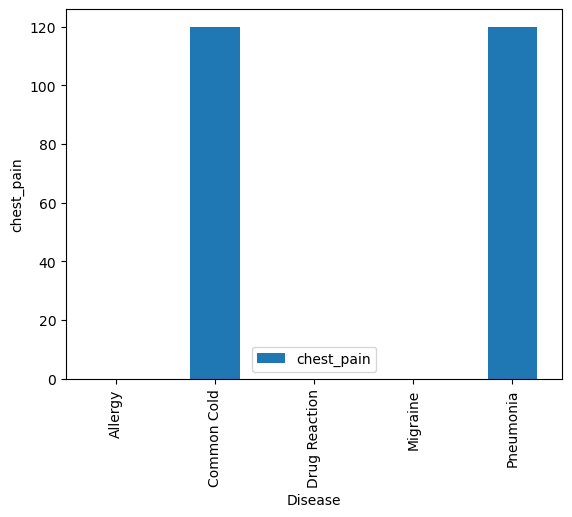

In [22]:
# Plot for chest_pain
plot_diseases(disease_groupby, 'chest_pain')

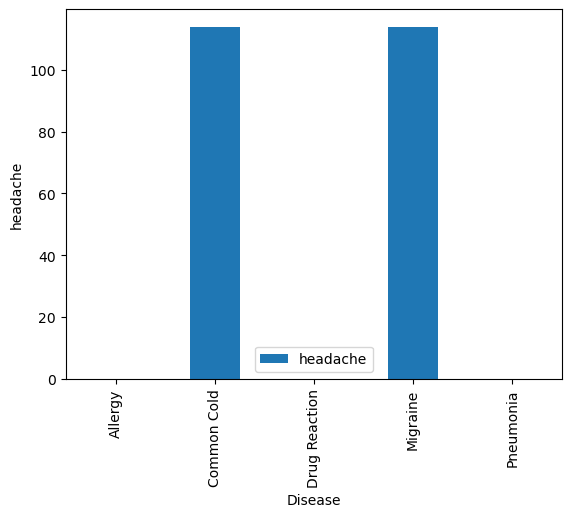

In [23]:
# Plot for headache
plot_diseases(disease_groupby, 'headache')

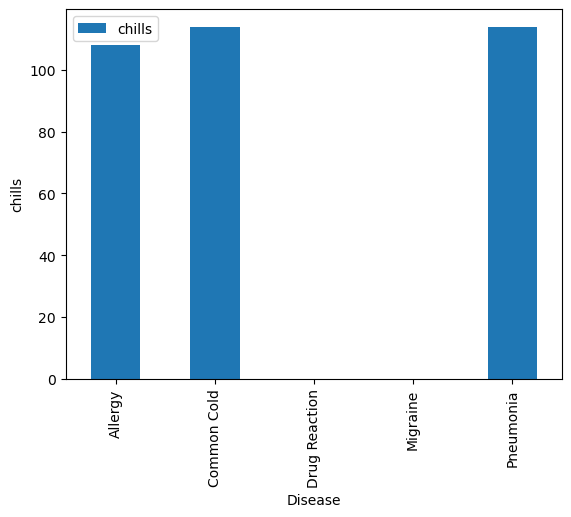

In [24]:
# Plot for chills
plot_diseases(disease_groupby, 'chills')

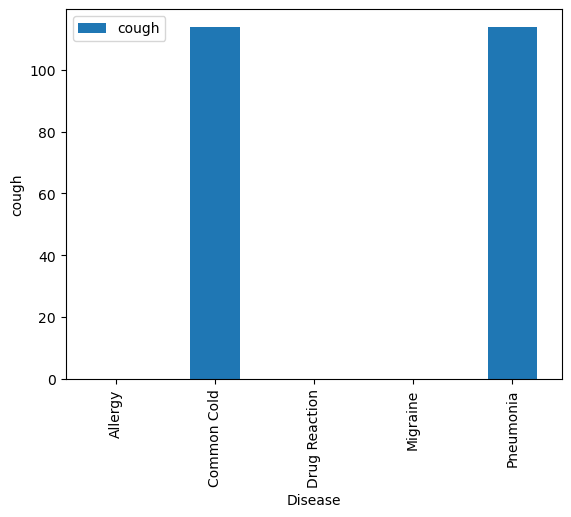

In [25]:
# Plot for cough
plot_diseases(disease_groupby, 'cough')

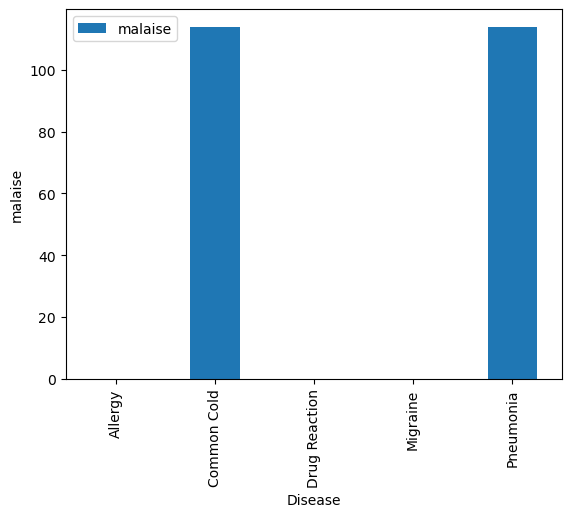

In [26]:
# Plot for malaise
plot_diseases(disease_groupby, 'malaise')

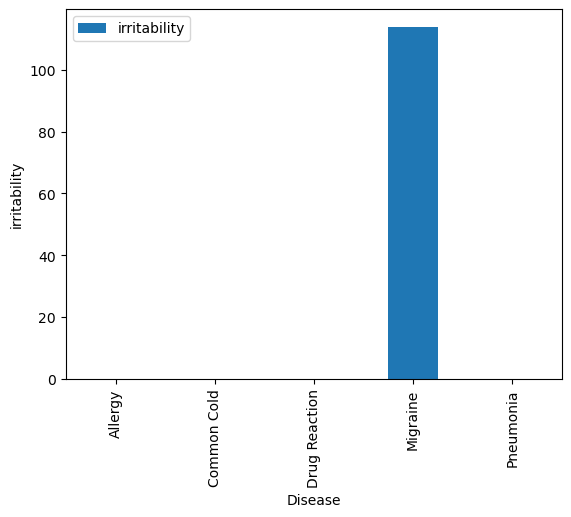

In [27]:
# Plot for irritability
plot_diseases(disease_groupby, 'irritability')

## Data Pre-Processing - Output Data

In [28]:
# Review the output data
y.head()

10    Allergy
11    Allergy
12    Allergy
13    Allergy
14    Allergy
Name: Disease, dtype: object

In [29]:
# Convert the 5 diseases to numerical values
y = y.replace(["Allergy", "Drug Reaction", "Migraine", "Common Cold", "Pneumonia"], [0, 1, 2, 3, 4])

In [30]:
# Confirm that the diseases were replaced with integers
y.value_counts()

Disease
0    120
1    120
2    120
3    120
4    120
Name: count, dtype: int64

In [31]:
# Concatenate the encoded features and output data
data_encoded = pd.concat([X, y], axis=1)
data_encoded = data_encoded.reset_index()

In [32]:
# Drop the "index" column
data_encoded = data_encoded.drop(columns="index")
data_encoded

,acidity,continuous_sneezing,itching,chills,fatigue,indigestion,shivering,skin_rash,cough,headache,...,fast_heart_rate,throat_irritation,redness_of_eyes,rusty_sputum,sinus_pressure,runny_nose,congestion,loss_of_smell,muscle_pain,Disease
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
597,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
598,0,1,0,1,1,0,0,0,1,1,...,0,1,1,0,1,1,1,1,1,3


In [33]:
data_encoded.to_csv('../Data/encoded_data.csv')

In [34]:
# This code will be needed once the data has been split into training and test data

# Dependencies
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.utils import to_categorical

# We need to convert our target labels (expected values) to categorical data
# num_classes = 5
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)
# y_train[0]